In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

In [9]:
##Data Aquisition
me = np.load('LO_3_MG/3Jet_500000.npy', allow_pickle=True) #Matrix elements - test
momentum = np.load('LO_3_0.01_NJet/PS3_0.01_500000.npy', allow_pickle=True, encoding='bytes') #4-momenta of input states
momentum = np.array([np.array(element) for element in momentum])

In [10]:
##Minkowski product of 4-vectors p1, p2, across two arrays.
def m_prod_arr(p1, p2):
    return np.multiply(p1[:,0], p2[:,0]) - np.sum(np.multiply(p1[:,1:], p2[:,1:]), axis=1)

In [11]:
##Minkowski product of 4-vectors, vector inputs
def m_prod(p1, p2):
    return np.multiply(p1[0], p2[0]) - np.sum(np.multiply(p1[1:], p2[1:]))

In [12]:
#Helpful sums
p_12 = momentum[:,2]+momentum[:,3] #p1+p2
p_13 = momentum[:,2]+momentum[:,4] #p1+p3
p_23 = momentum[:,3]+momentum[:,4] #p2+p3

In [13]:
s_12 = m_prod_arr(p_12, p_12)
s_13 = m_prod_arr(p_13, p_13)
s_23 = m_prod_arr(p_23, p_23)
S = s_12 + s_13 + s_23 #Center of mass energy

In [7]:
x1 = np.divide(s_12, S)
x2 = np.divide(s_13, S)
x3 = np.divide(s_23, S)


x2i = np.linspace(0, 1, 500) #x1 coordinates
x3i = np.linspace(0, 1, 500) #x2 coordinates
X2i, X3i = np.meshgrid(x2i, x3i) #2d regularly spaced grid of coordinates.

In [8]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x2, x3), me, (X2i, X3i), method='linear') 

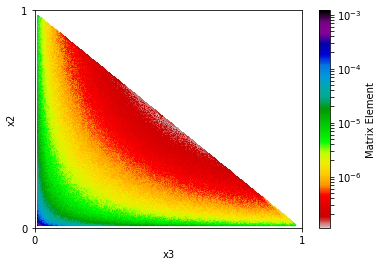

In [10]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r', norm = colors.LogNorm()) #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x3')

plt.savefig('DalitzPlot_MG')

Test analytic momentum formula

In [15]:
def analytic_me(q1, q2, p1, p2, p3):
    constants = 1
    return constants*(m_prod(p1, q1)**2 + m_prod(p1, q2)**2 + m_prod(p2, q1)**2 + m_prod(p2, q2)**2)/(m_prod(p1, p3)*m_prod(p2, p3))

In [13]:
print(momentum[2])
print(analytic_me(*momentum[2])/me[2])


[[ 500.            0.            0.          500.        ]
 [ 500.            0.            0.         -500.        ]
 [ 192.85568202 -112.9647206   151.79019507  -37.30982002]
 [ 399.15658211   99.79446484   68.71569135  380.32248893]
 [ 407.98773587   13.17025576 -220.50588642 -343.01266892]]
9571218.573704215


In [14]:
ka,kb,k1,k2,k3 = momentum[2]
swapped = [ka,kb, k3,k2,k1]
print(analytic_me(*momentum[2]))
analytic_me(*swapped)

5.529835173358089


31.68948994824754

In [15]:
for i in range(40):
    print(analytic_me(*momentum[i])/me[i])

9571218.573704204
9571218.573704166
9571218.573704215
9571218.573704237
9571218.57370419
9571218.573704211
9571218.573704192
9571218.573704105
9571218.573704196
9571218.57370419
9571218.573704237
9571218.573704218
9571218.573704142
9571218.57370431
9571218.573704215
9571218.5737042
9571218.573704204
9571218.573704222
9571218.573704198
9571218.57370423
9571218.573704207
9571218.573704207
9571218.573704204
9571218.57370421
9571218.573704261
9571218.573704204
9571218.573704207
9571218.573704202
9571218.57370431
9571218.57370418
9571218.57370418
9571218.573704217
9571218.573704196
9571218.573704151
9571218.573704207
9571218.573704194
9571218.57370422
9571218.573704205
9571218.573704207
9571218.573704205


Log-Log plot: power dependency of the matrix element on S_23

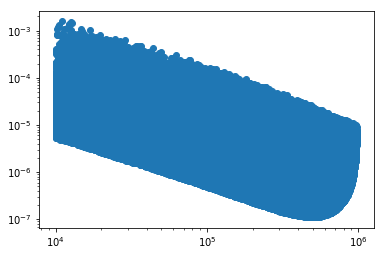

In [31]:
plt.yscale('log')
plt.xscale('log')
plt.scatter(s_23, me)

In [16]:
analytic_me = np.array([analytic_me(*momentum[i]) for i in range(len(me))])

lin_perc = np.mean(100*np.divide(np.abs(analytic_me - np.mean(analytic_me)*me/np.mean(me)), analytic_me))

print(lin_perc)

5.636680607956805e-13
